Import Libraries

In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Optional: set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [13]:

file_path = 'data/processed/credit_data.csv'
data = pd.read_csv(file_path)

# Quick look
print("Dataset shape:", data.shape)
print("\nColumns:\n", data.columns)
print("\nFirst 5 rows:\n", data.head())

Dataset shape: (32581, 12)

Columns:
 Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'target', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

First 5 rows:
    person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  target  \
0    PERSONAL          D      35000          16.02       1   
1   EDUCATION          B       1000          11.14       0   
2     MEDICAL          C       5500       

Check missingValues

In [14]:
print("\nMissing values per column:\n", data.isnull().sum())


Missing values per column:
 person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
target                           0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


Handle Missing Values

In [15]:

# Numerical columns
num_cols = data.select_dtypes(include=['float64','int64']).columns.tolist()

for col in num_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

# Categorical columns
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

for col in cat_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)

# Verify
print("\nMissing values after imputation:\n", data.isnull().sum())


Missing values after imputation:
 person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
target                        0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


/tmp/ipython-input-2246411350.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


Target Variable Analysis


Target value counts:
 target
0    25473
1     7108
Name: count, dtype: int64


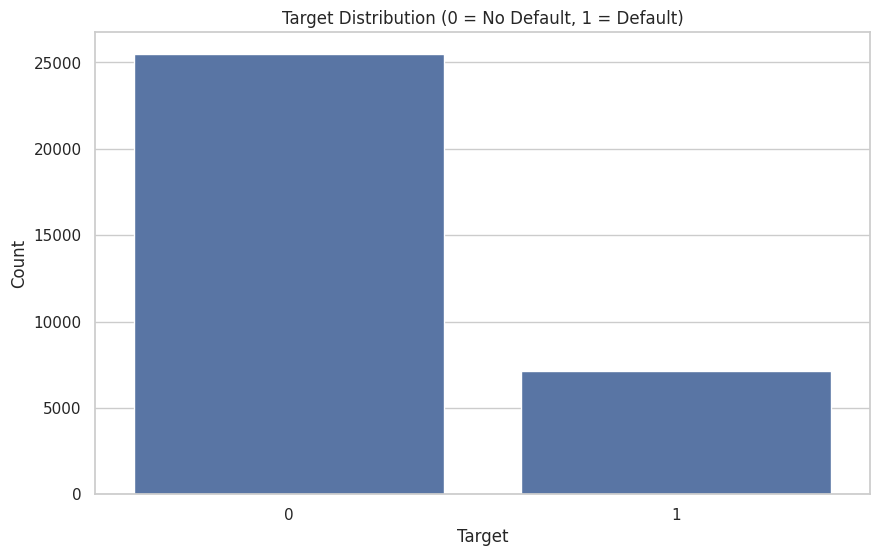

In [16]:

# Check target distribution
print("\nTarget value counts:\n", data['target'].value_counts())

# Plot target distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='target', data=data)
plt.title("Target Distribution (0 = No Default, 1 = Default)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

Numerical Feature Distribution

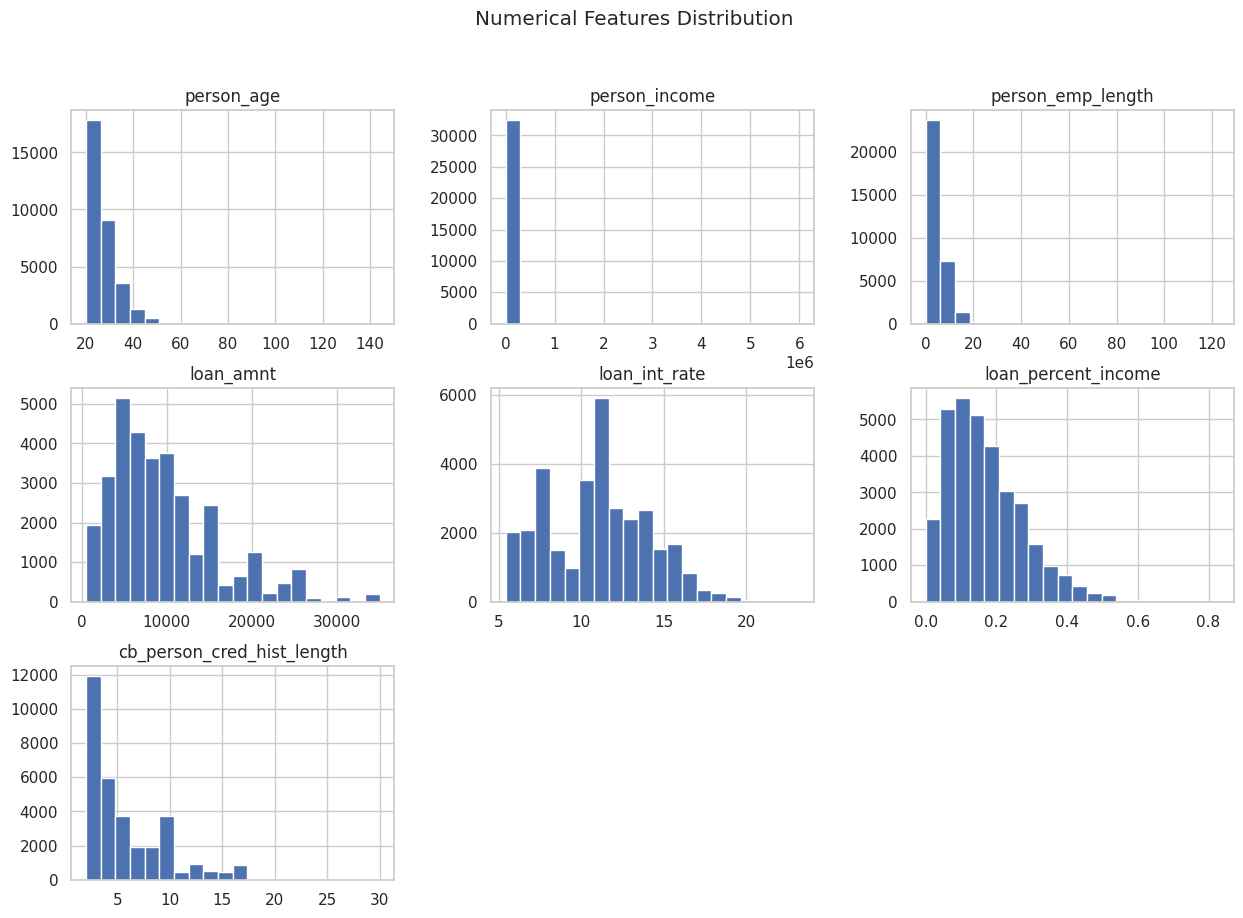

In [17]:

# Exclude target from numerical columns
num_cols.remove('target')

# Plot histograms
data[num_cols].hist(bins=20, figsize=(15,10))
plt.suptitle("Numerical Features Distribution")
plt.show()

Correlation Heatmap

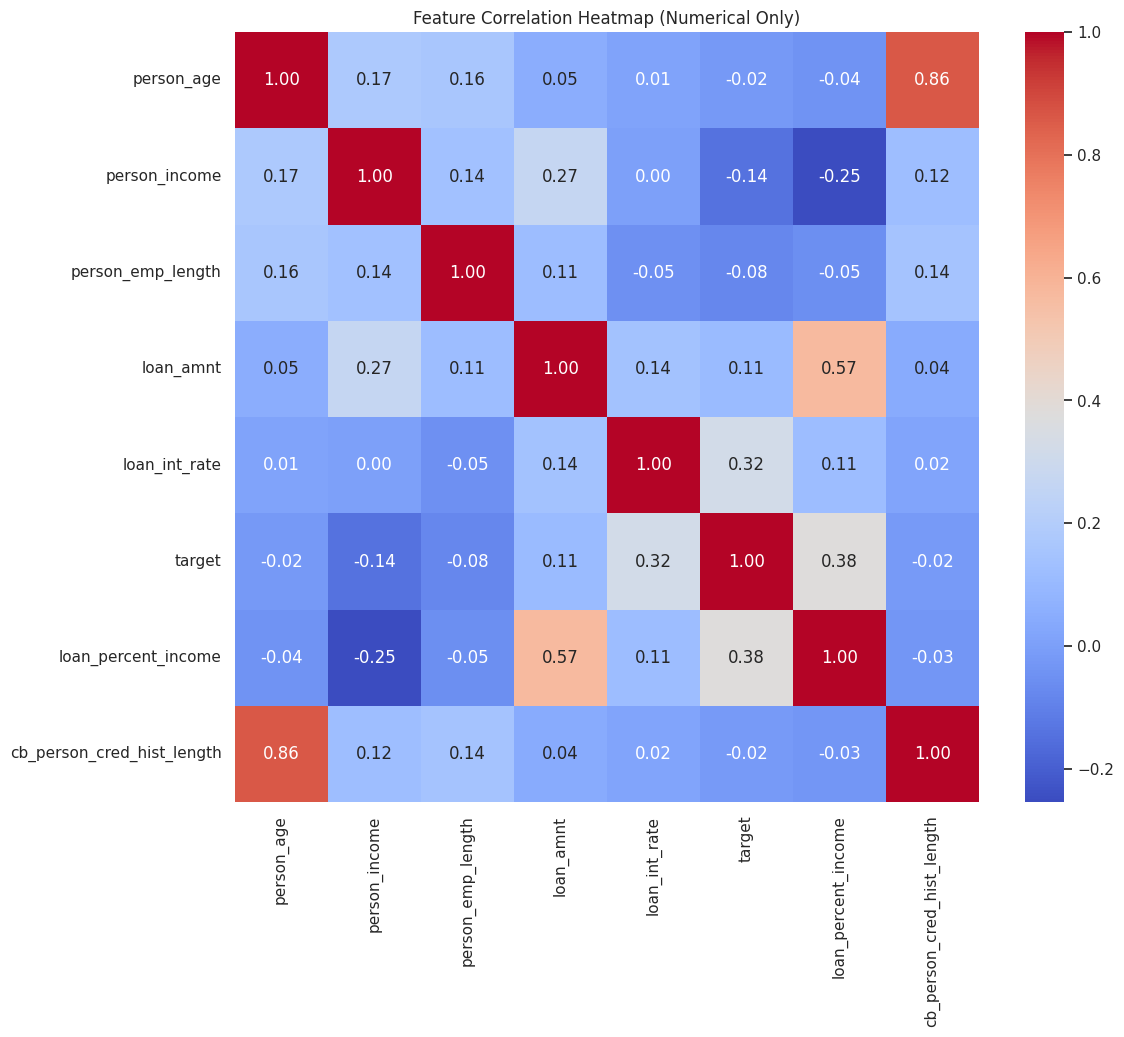

In [19]:

# Select only numerical columns
num_cols_corr = data.select_dtypes(include=['float64', 'int64']).columns

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data[num_cols_corr].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap (Numerical Only)")
plt.show()

Categorical Features Distribution

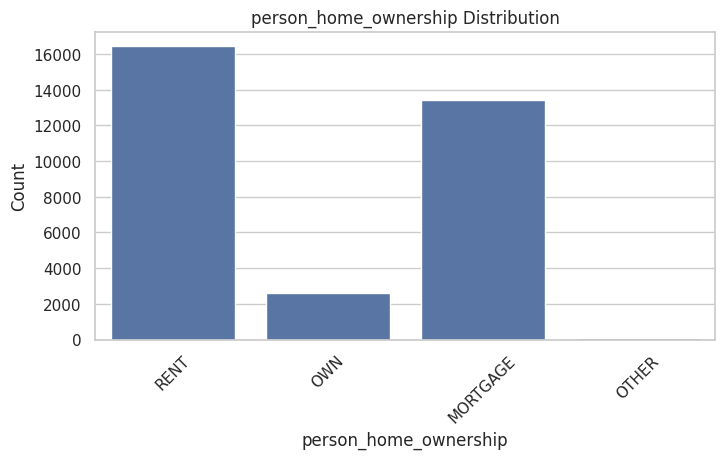

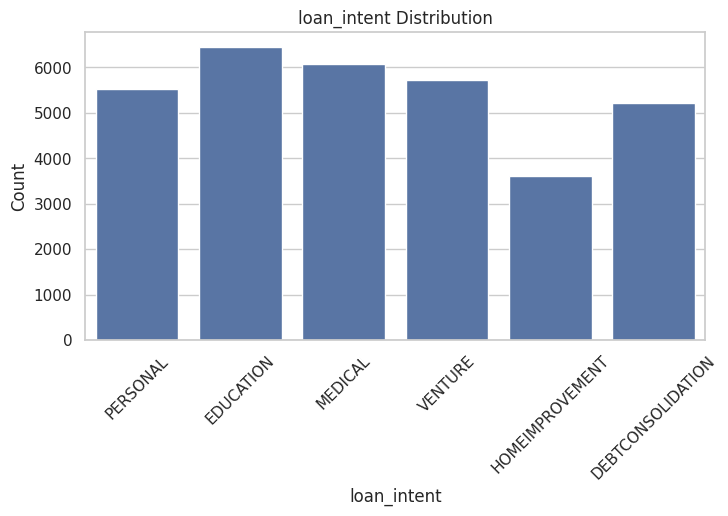

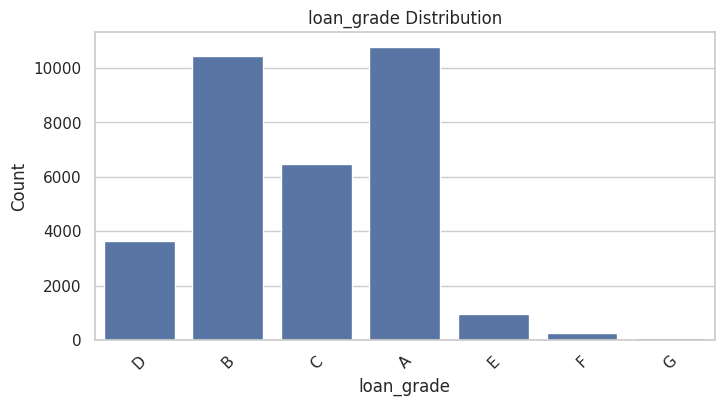

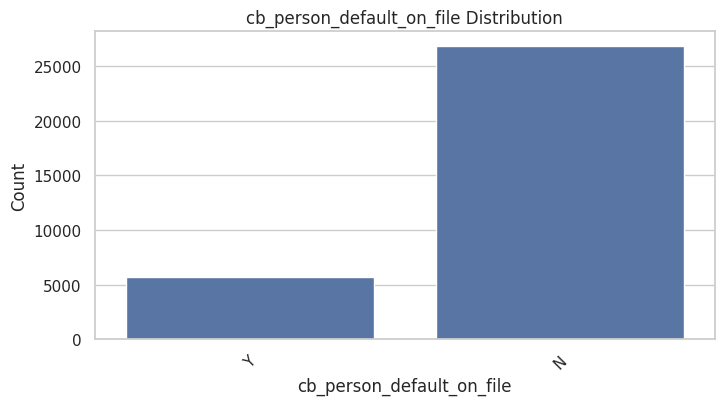

In [20]:

# Loop through categorical columns
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=data)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

Categorical Features vs Target

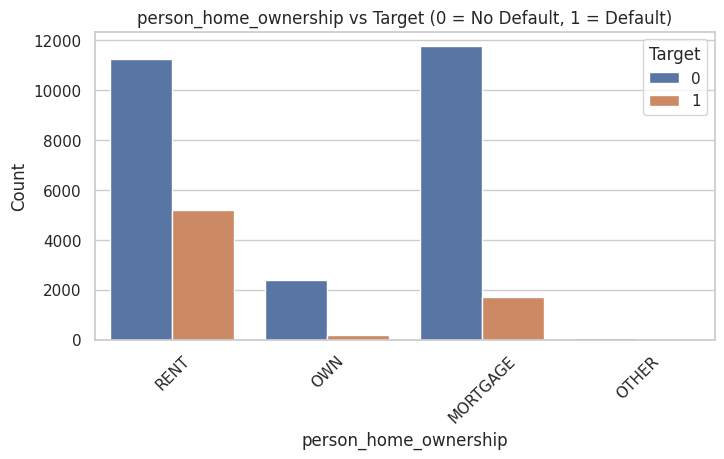

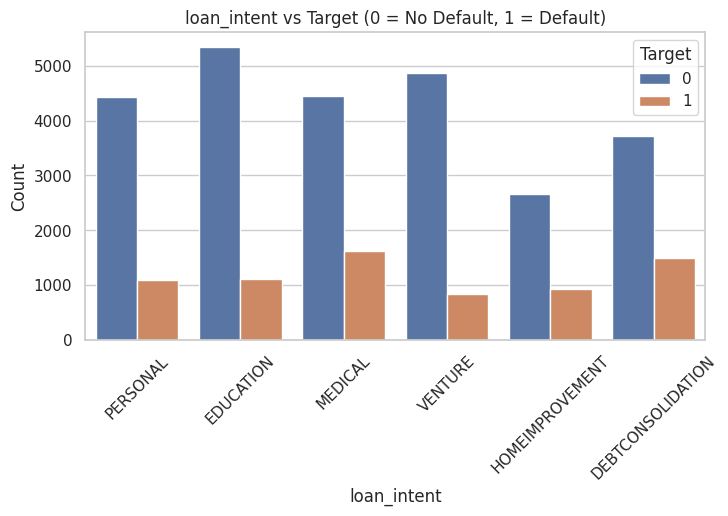

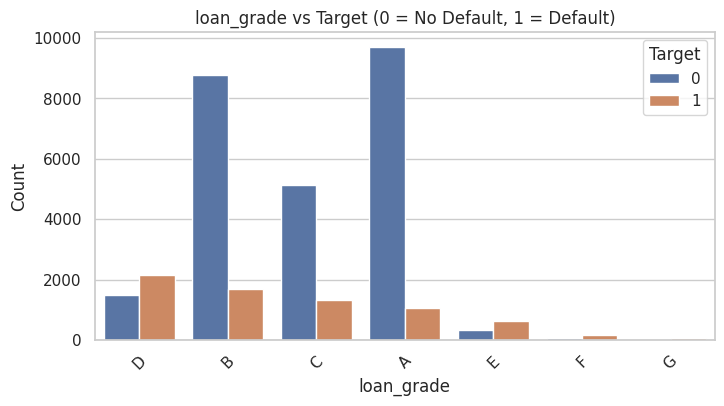

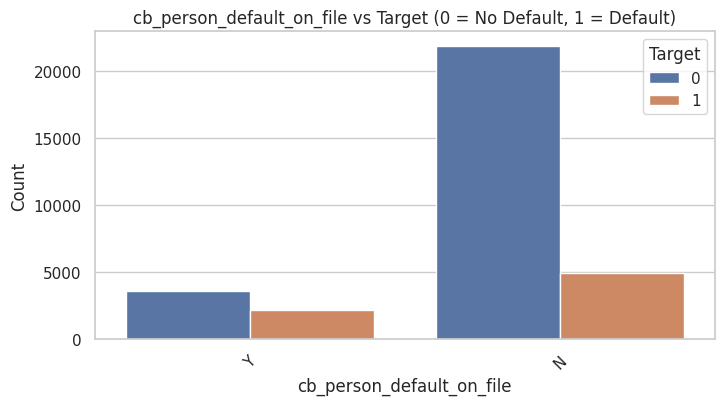

In [21]:

# Loop through categorical columns
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='target', data=data)
    plt.title(f"{col} vs Target (0 = No Default, 1 = Default)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title='Target')
    plt.show()

In [22]:

import os

# Create processed folder if it doesn't exist
os.makedirs('data/processed', exist_ok=True)

# Save dataset
eda_file = 'data/processed/credit_data_eda.csv'
data.to_csv(eda_file, index=False)
print(f"EDA dataset saved locally at: {eda_file}")

EDA dataset saved locally at: data/processed/credit_data_eda.csv


In [23]:

from google.colab import files
files.download('data/processed/credit_data_eda.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>